In social network analysis, the basic mathematical tool is graph theory. In this notebook, we will go through some basic graph practice, for example,
1. how to build simple social network graphs
2. how to customise the graph with extra variables and how to use them 
3. how to build a directional graphs

In [ ]:
!pip install --upgrade decorator
!pip install --upgrade networkx
!pip install scipy==1.8.0 # please make sure your scipy version is 1.8.0 in order to run scripy.sparse.coo_array in the package of network
!pip install --upgrade requests

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pprint as pp

# Greate your own graph

We can simply start adding edges by naming the nodes that are connected. Here, a weight (optional) is immediately included as well.

In [2]:
# initialise a graph
G = nx.Graph()

# add edges
# Weight means how many business trips between these two cities (not real data)
G.add_edge('London','Birmingham', weight = 5)
G.add_edge('London','Brighton', weight = 1)
G.add_edge('London','Bristol', weight = 1)
G.add_edge('London','York', weight = 2)
G.add_edge('York','Edinburgh', weight = 3)
G.add_edge('Edinburgh','Glasgow', weight = 2)

Describe edge and node

In [3]:
print('Edges')
print( G.number_of_edges())
print( G.edges())
print( )

print('Nodes')
print( G.number_of_nodes())
print( G.nodes())

Edges
6
[('London', 'Birmingham'), ('London', 'Brighton'), ('London', 'Bristol'), ('London', 'York'), ('York', 'Edinburgh'), ('Edinburgh', 'Glasgow')]

Nodes
7
['London', 'Birmingham', 'Brighton', 'Bristol', 'York', 'Edinburgh', 'Glasgow']


We can obtain various statistics regarding nodes:

In [4]:
for node in G.nodes():
    print('Number of neighbours of ', node, ':\t', len(G.adj[node]))
    print('Neighbours of ', node, ': ', G.adj[node])
    print('Degree: ', G.degree(node))
    print()

Number of neighbours of  London :	 4
Neighbours of  London :  {'Birmingham': {'weight': 5}, 'Brighton': {'weight': 1}, 'Bristol': {'weight': 1}, 'York': {'weight': 2}}
Degree:  4

Number of neighbours of  Birmingham :	 1
Neighbours of  Birmingham :  {'London': {'weight': 5}}
Degree:  1

Number of neighbours of  Brighton :	 1
Neighbours of  Brighton :  {'London': {'weight': 1}}
Degree:  1

Number of neighbours of  Bristol :	 1
Neighbours of  Bristol :  {'London': {'weight': 1}}
Degree:  1

Number of neighbours of  York :	 2
Neighbours of  York :  {'London': {'weight': 2}, 'Edinburgh': {'weight': 3}}
Degree:  2

Number of neighbours of  Edinburgh :	 2
Neighbours of  Edinburgh :  {'York': {'weight': 3}, 'Glasgow': {'weight': 2}}
Degree:  2

Number of neighbours of  Glasgow :	 1
Neighbours of  Glasgow :  {'Edinburgh': {'weight': 2}}
Degree:  1



In [5]:
node_of_interest = "London"

for node in G.neighbors(node_of_interest):
    print(node_of_interest, 'is a connected to', node )

London is a connected to Birmingham
London is a connected to Brighton
London is a connected to Bristol
London is a connected to York


Drawing a graph is relatively straightforward as well:

{'Birmingham': array([ 0.45012958, -0.10514846]),
 'Brighton': array([0.2815859 , 0.68174282]),
 'Bristol': array([0.85686654, 0.24889344]),
 'Edinburgh': array([-0.62024659, -0.30906297]),
 'Glasgow': array([-1.        , -0.49000625]),
 'London': array([0.26708137, 0.10018216]),
 'York': array([-0.2354168 , -0.12660074])}


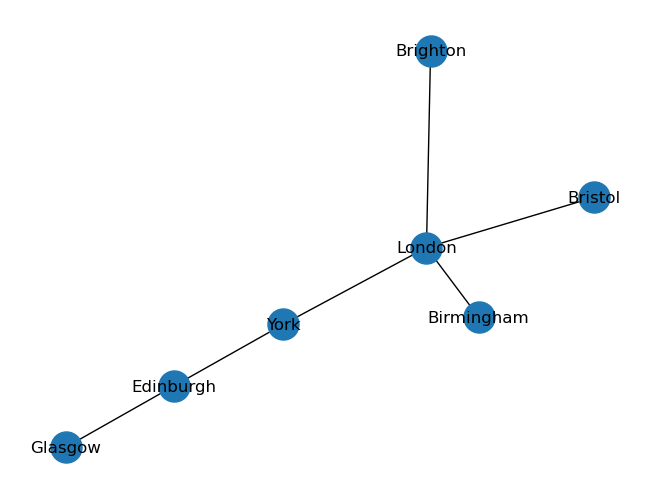

In [6]:
# Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G)
pp.pprint(pos)

nx.draw(G, pos, with_labels= True, node_size = 500)
plt.show()

It looks the nodes are a little small, let's re-scale the size of nodes

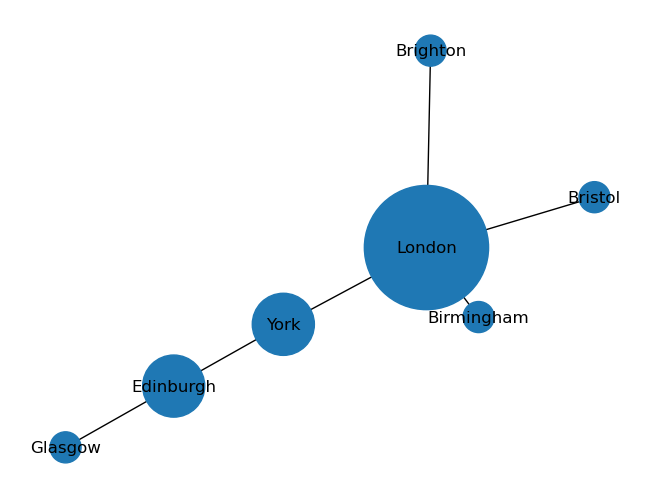

In [7]:
sizes = [G.degree(node) **2 * 500 # multiply
         for node in G.nodes()
        ]
    
# pos = nx.spring_layout(G) 
# notice, you do not need to re-calculate spring layout, can just reuse previous positions 

nx.draw(G, pos, with_labels= True, node_size = sizes)
plt.show()

How to keep the position of graph?

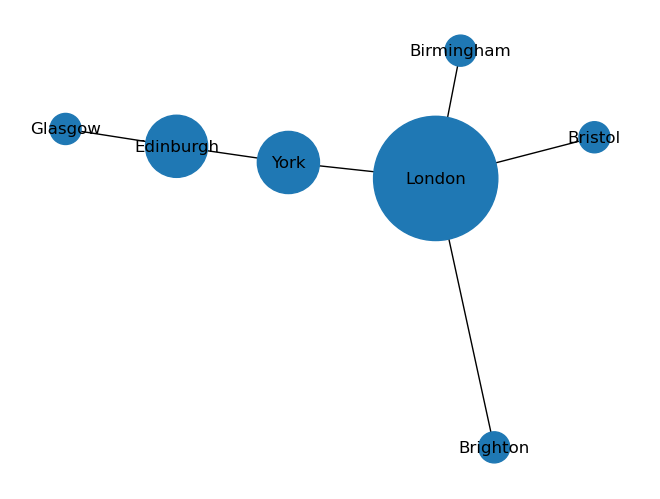

In [8]:
pos = nx.spring_layout(G, seed=2027) 

nx.draw(G, pos, with_labels= True, node_size = sizes)
plt.show()

## **!!! Open Questions: Can you also try to resize the edge based on the weights?**

# Extra variables

We can assign extra variables to a connection. This can be done either you're creating nodes, or after they're already created. You might have reasons for one or the other.
- Adding variables when creating a node is easier, e.g., when you're loading values from a file.
- Adding once the graph is created can give you values, such as position or degree.

[2, 1, 2, 3, 2, 1]


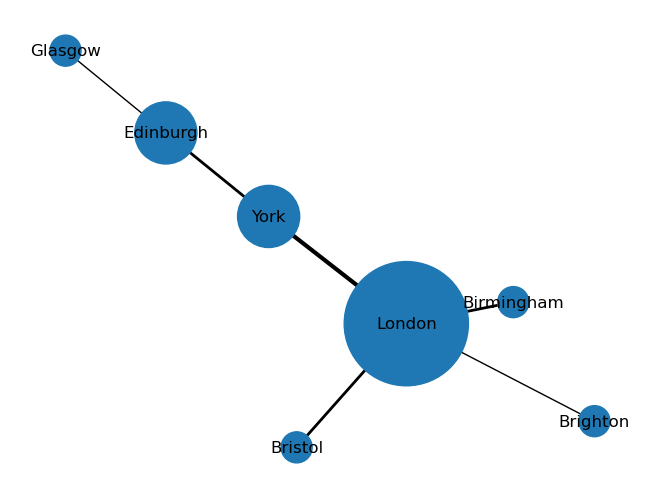

In [9]:
# initialise a graph
G = nx.Graph()

# Here I am adding a value for each connection, showing the distance between 
# these two cities (this is not the accurate data).

# you can come up with ANY variable name you want, and it will be added to the edge

# add edges
G.add_edge('London','Birmingham', weight = 5, distance=2)
G.add_edge('London','Brighton', weight = 1, distance=1)
G.add_edge('London','Bristol', weight = 1, distance=2)
G.add_edge('London','York', weight = 2, distance=3)
G.add_edge('York','Edinburgh', weight = 3, distance=2)
G.add_edge('Edinburgh','Glasgow', weight = 2, distance=1)

# get widths by getting value of 'distance' from each edge's data
widths = [G[edge[0]][edge[1]].get('distance',1)
          for edge in G.edges()]

sizes = [G.degree(node) **2 * 500 # exponential. in python **2 means 'to the power of 2'
         for node in G.nodes()
        ]

#recap: some_dictionary.get() takes two arguments: key to find, and default value if key not present

print(widths)
pos = nx.spring_layout(G, seed=2007)

nx.draw(G, pos, with_labels= True, node_size = sizes, width= widths)
plt.show()

It looks a little weired because distance shown in the graph is not the distance between two cities. 

## **!!!Open Question, can you change the roles of 'weights' and 'distance' shown in the graphs?**

For many reasons, you want to add variables to edges even the graph was created.

You could do it like in the example below where we access value of a node that had to be calculated (eg. number of neighbours, or other metric)

In [11]:
for edge in G.edges():
    print("edge as tupple:",edge)
    source = edge[0]
    target = edge[1]
    source_neighbours_count =  len(list(G.neighbors(source)))
    target_neighbours_count = len(list(G.neighbors(target)))
    G[source][target]['total_neighbours'] = source_neighbours_count + target_neighbours_count

edge as tupple: ('London', 'Birmingham')
edge as tupple: ('London', 'Brighton')
edge as tupple: ('London', 'Bristol')
edge as tupple: ('London', 'York')
edge as tupple: ('York', 'Edinburgh')
edge as tupple: ('Edinburgh', 'Glasgow')


In [12]:
for edge in G.edges():
    print(G.get_edge_data(edge[0], edge[1]))

{'weight': 5, 'distance': 2, 'total_neighbours': 5}
{'weight': 1, 'distance': 1, 'total_neighbours': 5}
{'weight': 1, 'distance': 2, 'total_neighbours': 5}
{'weight': 2, 'distance': 3, 'total_neighbours': 6}
{'weight': 3, 'distance': 2, 'total_neighbours': 4}
{'weight': 2, 'distance': 1, 'total_neighbours': 3}


These are useful for drawing, e.g., the edge width.

We can add the widths as an argument to the draw function:

[25, 25, 25, 36, 16, 9]


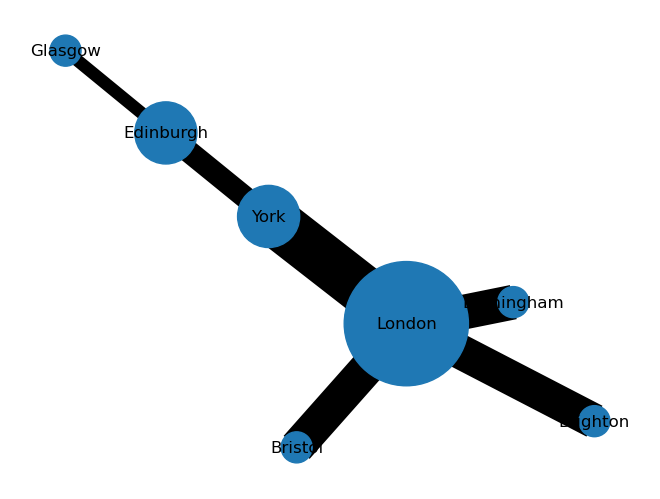

In [13]:
widths = [G[edge[0]][edge[1]].get('total_neighbours',1) **2
          for edge in G.edges()]

print(widths)

pos = nx.spring_layout(G, seed=2007)

nx.draw(G, pos, with_labels= True, node_size = sizes, width= widths)
plt.show()

# How to use distance as distance in the Graph?

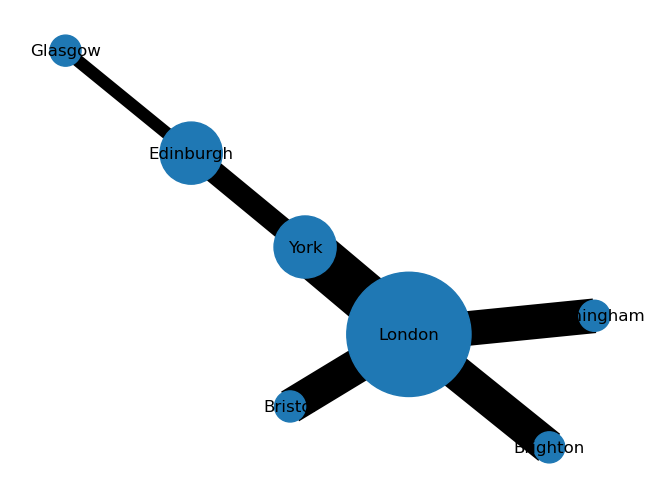

In [16]:
# We only need to set the weight for the spring_layout.
pos = nx.spring_layout(G, weight='distance', seed=2)

nx.draw(G, pos, with_labels= True, node_size = sizes, width=widths)

Does it look fine? No, it seems the result is **opposite**! Because the distance between 'London' and 'York' is 3 (longest) but the shown distance is the shortest one! 

## How to solve it?

We can just use `1/distance`!

In [17]:
for edge in G.edges():
    source = edge[0]
    target = edge[1]
    G[source][target]['opposite-distance'] = 1 / G[source][target]['distance']

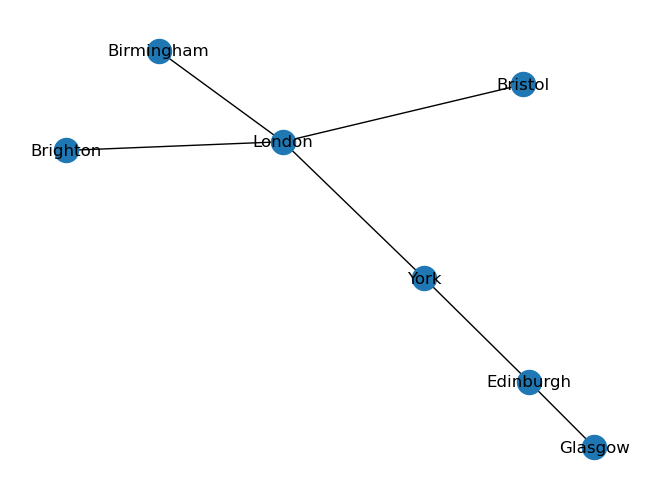

In [20]:
pos = nx.spring_layout(G, weight='opposite-distance',seed=100)
nx.draw(G, pos, with_labels= True)

It looks much better, however, it is still not truly proportional to the value of `distance`!

If you want to have a truly display proportional to `distance`, then you should use more parameters in `spring_layout`, e.g., `fixed`. More details can be found in https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout

Also, you can probably use other layouts, e.g., `random_layout`, `spectral_layout`...

# Draw a directed graphs

In [ ]:
DG = nx.DiGraph()
DG.add_edge('beyonce','mia', weight = 5)
DG.add_edge('beyonce','azealia', weight = 1)
DG.add_edge('beyonce','jayz', weight = 1)
DG.add_edge('beyonce','madonna', weight = 2)
DG.add_edge('madonna','azealia', weight = 1)
DG.add_edge('nicki','azealia', weight = 1)

DG.add_edge('mia','beyonce', weight = 5)
DG.add_edge('jayz','beyonce', weight = 1)
DG.add_edge('mia','jayz', weight = 2)

pos = nx.spring_layout(DG)

nx.draw(DG, pos, with_labels= True, node_size = 2000, width=2)
plt.show()

## Exercise 1: Draw a network graph of Edinburgh Wavelet Train Station

## Exercise 2: Draw a directed graphs of your choice

# More graphs

In the next, we will look at:
- Loading and saving graph data into files, refer to https://networkx.org/documentation/stable/reference/readwrite/index.html
- Using bipartite graphs with two types of nodes
- styling graphs

## Write and read from edgelist

edge list format is: `Source Destination {'attribute':value}`

In [ ]:
# initialise a graph
G = nx.Graph()

# add edges
# Weight means how many business trips between these two cities (not real data)
G.add_edge('London','Birmingham', weight = 5)
G.add_edge('London','Brighton', weight = 1)
G.add_edge('London','Bristol', weight = 1)
G.add_edge('London','York', weight = 2)
G.add_edge('York','Edinburgh', weight = 3)
G.add_edge('Edinburgh','Glasgow', weight = 2)

nx.draw(G, with_labels= True, node_size = 500)
plt.show()

In [ ]:
# you can save your graph as a file:
nx.write_edgelist(G,'data/graph_city_edgelist.csv') # save to a new file

In [ ]:
# Also we can read it from a csv file.
G = nx.read_edgelist('data/graph_city_edgelist.csv')

nx.draw(G, with_labels= True, node_size = 1000)
plt.show()

## Write and read from adjacency list

Adjacency list format: `source target target target target`

In [ ]:
# save to a new file
nx.write_adjlist(G,'data/graph_city_adjacency.csv') 

In [ ]:
G = nx.read_adjlist('data/graph_city_adjacency.csv')

nx.draw(G, with_labels= True, node_size = 500)
plt.show()

## Bipartite graphs

Bipartite graphs contain two types of nodes. They are not a different object, but you can specify the type of connection by using the bipartite attribute:

In [ ]:
from networkx.algorithms import bipartite

In [ ]:
B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(["jill", "nicky", "tessa", "aga", "ecka", "min", "paola"], bipartite=0)
B.add_nodes_from(["netflix", "facebook", "instagram"], bipartite=1)

B.add_edge('jill','netflix')
B.add_edge('jill','facebook')
B.add_edge('jill','instagram')
B.add_edge('nicky','facebook')
B.add_edge('nicky','instagram')
B.add_edge('tessa','instagram')
B.add_edge('aga','instagram')
B.add_edge('aga','netflix')
B.add_edge('ecka','instagram')
B.add_edge('ecka','facebook')
B.add_edge('min','instagram')
B.add_edge('paola','instagram')


print(B.edges()) #all edges

In [ ]:
print(bipartite.color(B)) # returns values of 'bipartite' variable

In [ ]:
def nodes_colours(graph):
    nodes = graph.nodes() # nodes in correct order
    colours_dict = bipartite.color(graph) # dict with 0 or 1 telling you which group node is in
    return [
        "lightblue" if colours_dict[node] == 1 else "red"
        for node in nodes
    ]

pos = nx.spring_layout(B)

nx.draw(B, pos, with_labels= True, node_size = 2000, width = 3, node_color = nodes_colours(B)  )
plt.show()

## Another approach to style and specify details of a graph

In [ ]:
users = [node for node in B.nodes() if bipartite.color(B)[node]==1]
websites = [node for node in B.nodes() if bipartite.color(B)[node]!=1]
print("websites",websites)
print("users",users)

In [ ]:
nodePos = nx.spring_layout(B)

nx.draw_networkx_nodes(B, nodePos, 
                       nodelist=websites, 
                       node_size = 1500, 
                       node_color ='red', 
                       node_shape ='o')

nx.draw_networkx_nodes(B, nodePos, 
                       nodelist=users, 
                       node_size=1000, 
                       node_color ='lightblue', 
                       node_shape ='s')

nx.draw_networkx_labels(B, pos=nodePos, font_size=15, 
                        font_family='sans-serif')

nx.draw_networkx_edges(B,nodePos)


plt.axis('off')
plt.show()

# Graph metrics

In the next, we will look at graph metrics:
- degree
- bewteenness
- pagerank
- hits

In [ ]:
import pandas as pd
from scipy import sparse

In [ ]:
# import a dataframe
df = pd.read_csv('data/graph_simple.csv', index_col = 0)
print(df)

In [ ]:
# use this dataframe to build the network
DG = nx.DiGraph()
for row, row_values in df.iterrows():
    print('\nNode: ', row)
    for column, value in enumerate(row_values):
        if value > 0:
            print('Connected to ', df.columns[column], ' with weight: ', value)
            DG.add_edge(row, df.columns[column], weight=value)

In [ ]:
pos = nx.spring_layout(DG)

nx.draw(DG, pos, with_labels= True, node_size = 1000)
plt.show()

In [ ]:
import scipy.sparse.linalg
degree = nx.degree_centrality(DG)
betweenness = nx.betweenness_centrality(DG)
pagerank = nx.pagerank(DG)
hits = nx.hits(DG)

In [ ]:
pp.pprint(degree)

pos = nx.spring_layout(DG)

size = [value * 1000 for value in degree.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to degree")
plt.show()

In [ ]:
pp.pprint(betweenness)

pos = nx.spring_layout(DG)

size = [(value) * 10000  for value in betweenness.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to betweenness")
plt.show()

In [ ]:
pp.pprint(pagerank)

pos = nx.spring_layout(DG)

size = [value * 10000 for value in pagerank.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to PageRank")
plt.show()

In [ ]:
pp.pprint(hits[0])

pos = nx.spring_layout(DG)

size = [value * 10000 for value in hits[0].values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to hub scores")
plt.show()

In [ ]:
print(hits[1])

pos = nx.spring_layout(DG)

size = [value * 10000 for value in hits[1].values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to authority scores")
plt.show()

## **!!! Open Questions which nodes are more likely hubs? which nodes are more likely authority?**


If the network is really complex and large, you may need to consider another tool, **graph-tool**: https://graph-tool.skewed.de/, en efficient Python module for analysing graphs or networks